In [ ]:
!pip install imagehash
!pip install -q kaggle

In [ ]:
!pip install scikit-image imagehash

In [ ]:
pip install tensorflow==2.18.0

In [ ]:
import os
import numpy as np
import shutil
from skimage.metrics import structural_similarity as ssim
from PIL import Image
from tqdm import tqdm
import kagglehub
import matplotlib.pyplot as plt
from PIL import Image
import imagehash
from collections import defaultdict
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile


from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
files.upload()

Saving kaggle_2.json to kaggle_2.json


{'kaggle_2.json': b'{"username":"dipakkumarchauhan","key":"757bb7c0a707c5b683eeeeb456cdb758"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle_2.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle datasets download -d pkdarabi/medical-image-dataset-brain-tumor-detection
!unzip -q medical-image-dataset-brain-tumor-detection.zip



Dataset URL: https://www.kaggle.com/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection
License(s): Attribution 4.0 International (CC BY 4.0)
medical-image-dataset-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
for root, dirs, files in os.walk(".", topdown = True):
  for name in dirs:
    print(os.path.join(root,name))

./.config
./BrainTumor
./medical-image-dataset-brain-tumor-detection
./sample_data
./.config/logs
./.config/configurations
./.config/logs/2025.05.08
./BrainTumor/BrainTumorYolov9
./BrainTumor/BrainTumorYolov11
./BrainTumor/BrainTumorYolov8
./BrainTumor/BrainTumorYolov9/valid
./BrainTumor/BrainTumorYolov9/test
./BrainTumor/BrainTumorYolov9/train
./BrainTumor/BrainTumorYolov9/valid/images
./BrainTumor/BrainTumorYolov9/valid/labels
./BrainTumor/BrainTumorYolov9/test/images
./BrainTumor/BrainTumorYolov9/test/labels
./BrainTumor/BrainTumorYolov9/train/images
./BrainTumor/BrainTumorYolov9/train/labels
./BrainTumor/BrainTumorYolov11/valid
./BrainTumor/BrainTumorYolov11/test
./BrainTumor/BrainTumorYolov11/train
./BrainTumor/BrainTumorYolov11/valid/images
./BrainTumor/BrainTumorYolov11/valid/labels
./BrainTumor/BrainTumorYolov11/test/images
./BrainTumor/BrainTumorYolov11/test/labels
./BrainTumor/BrainTumorYolov11/train/images
./BrainTumor/BrainTumorYolov11/train/labels
./BrainTumor/BrainTumorYo

In [ ]:
zip_path =  "medical-image-dataset-brain-tumor-detection.zip"
extract_path = "medical-image-dataset-brain-tumor-detection"

#unziping the dataset

with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
print (" Contents of extracted dataset: ")
print(os.listdir(extract_path))

 Contents of extracted dataset: 
['BrainTumor']


In [ ]:
dataset_path = "./medical-image-dataset-brain-tumor-detection"

for root ,  dirs, files in os.walk(dataset_path):
  print(f"{root} contains {len(files)} files")

./medical-image-dataset-brain-tumor-detection contains 0 files
./medical-image-dataset-brain-tumor-detection/BrainTumor contains 0 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9 contains 1 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/valid contains 0 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/valid/images contains 612 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/valid/labels contains 612 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/test contains 0 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/test/images contains 308 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/test/labels contains 308 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/train contains 0 files
./medical-image-dataset-brain-tumor-detection/BrainTumor/Bra

In [ ]:
os.listdir("/content")

['.config',
 'BrainTumor',
 'brain_tumor_Hybrid_model.pkl',
 'brain_tumor_xception_model.h5',
 'medical-image-dataset-brain-tumor-detection.zip',
 'medical-image-dataset-brain-tumor-detection',
 'sample_data']

In [ ]:

# List the contents of both dataset folders
print("medical-image-dataset-brain-tumor-detection:", os.listdir("/content/medical-image-dataset-brain-tumor-detection"))
print("BrainTumor:", os.listdir("/content/BrainTumor"))


medical-image-dataset-brain-tumor-detection: ['BrainTumor']
BrainTumor: ['BrainTumorYolov9', 'BrainTumorYolov11', 'BrainTumorYolov8']


Total images found: 9192


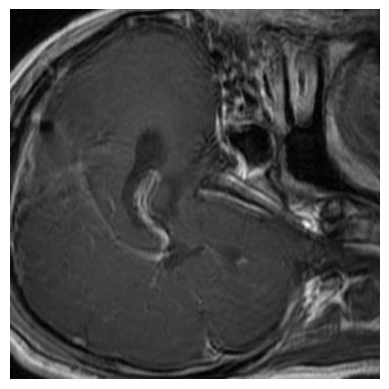

In [ ]:
# Base dataset path (update this)
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

# Folder names
yolo_versions =  ["BrainTumorYolov8" ,"BrainTumorYolov9", "BrainTumorYolov11" ]
subdirs =  ["train/images" ,  "test/images" , "valid/images"]

image_files = []

for yolo_versions in yolo_versions:
    for subdir in subdirs:
        img_dir = os.path.join(dataset_path, yolo_versions, subdir)
        if(os.path.exists(img_dir)):
          for file in os.listdir(img_dir):
            if file.lower().endswith((".jpg", ".png" , ".jpeg" , ".tif" , ".bmp")):
              image_files.append(os.path.join(img_dir, file))

if len(image_files) == 0:
  print("No images found check folder")
else:
  print(f"Total images found: {len(image_files)}")

# Open the first image to verify

img = Image.open(image_files[0])
plt.imshow(img)
plt.axis('off')
plt.show()



In [ ]:
import os
import numpy as np
import shutil
import imagehash
from skimage.metrics import structural_similarity as ssim
from PIL import Image
from tqdm import tqdm
from collections import defaultdict

# Function to compute perceptual hash (PHash)
def get_phash(image_path, size=(200, 200)):
    try:
        img = Image.open(image_path).convert("L").resize(size)
        return str(imagehash.phash(img))
    except Exception as e:
        print(f"🚨 Error computing PHash for {image_path}: {e}")
        return None

# Function to preprocess an image for SSIM
def preprocess_image(image_path, size=(200, 200)):
    try:
        img = Image.open(image_path).convert("L").resize(size)
        return np.array(img)
    except Exception as e:
        print(f"🚨 Error processing {image_path}: {e}")
        return None

# Function to remove duplicate images using PHash + SSIM
def remove_duplicates(image_files, phash_threshold=10, ssim_threshold=0.90):
    phash_dict = defaultdict(list)
    duplicates = set()

    print("🔍 Computing PHash for images...")
    for img_path in tqdm(image_files):
        phash = get_phash(img_path)
        if phash is not None:
            phash_dict[phash[:4]].append((phash, img_path))

    print("🔍 Running SSIM on similar PHash images...")
    for phash_group in tqdm(list(phash_dict.values())):
        total_images = len(phash_group)
        for i in range(total_images):
            if phash_group[i][1] in duplicates:
                continue

            img1 = preprocess_image(phash_group[i][1])
            if img1 is None:
                continue

            for j in range(i + 1, total_images):
                if phash_group[j][1] in duplicates:
                    continue

                if abs(int(phash_group[i][0], 16) - int(phash_group[j][0], 16)) > phash_threshold:
                    continue

                img2 = preprocess_image(phash_group[j][1])
                if img2 is None:
                    continue

                score = ssim(img1, img2)

                if score >= ssim_threshold:
                    duplicates.add(phash_group[j][1])

    return duplicates

# Step 3: Collect all image paths
image_files = []

# ✅ Corrected dataset path
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

yolo_versions = ["BrainTumorYolov8", "BrainTumorYolov9", "BrainTumorYolov11"]
subdirs = ["train/images", "test/images", "valid/images"]

for yolo_version in yolo_versions:
    for subdir in subdirs:
        img_dir = os.path.join(dataset_path, yolo_version, subdir)
        print(f"Checking folder: {img_dir}")

        if os.path.exists(img_dir):
            files = os.listdir(img_dir)
            print(f"📂 Found {len(files)} files in {img_dir}")

            for file in files:
                if file.lower().endswith((".jpg", ".png", ".jpeg", ".tif", ".bmp")):
                    image_files.append(os.path.join(img_dir, file))
        else:
            print(f"🚨 Folder does not exist: {img_dir}")

print(f"🔍 Found {len(image_files)} images in dataset.")

if len(image_files) == 0:
    print("❌ No images found! Check your dataset path and structure.")
else:
    print(f"✅ Starting duplicate removal for {len(image_files)} images...")

    # Step 4: Run optimized duplicate detection
    duplicates = remove_duplicates(image_files)

    print(f"🗑️ Detected {len(duplicates)} duplicate images.")

    if duplicates:
        for duplicate in duplicates:
            os.remove(duplicate)

        print(f"✅ Removed {len(duplicates)} duplicate images.")
    else:
        print("✅ No duplicates found!")


Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/images
📂 Found 2144 files in /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/images
Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images
📂 Found 308 files in /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/images
Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/images
📂 Found 612 files in /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/images
Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/train/images
📂 Found 2144 files in /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/train/images
Checking folder: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov

100%|██████████| 9192/9192 [00:47<00:00, 193.10it/s]


🔍 Running SSIM on similar PHash images...


100%|██████████| 2212/2212 [00:55<00:00, 39.89it/s]


🗑️ Detected 6128 duplicate images.
✅ Removed 6128 duplicate images.


In [ ]:
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

print("YOLO versions inside dataset:", os.listdir(dataset_path))


YOLO versions inside dataset: ['BrainTumorYolov9', 'BrainTumorYolov11', 'BrainTumorYolov8']


In [ ]:
image_dir = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/images"
print("Images in train set:", os.listdir(image_dir)[:10])  # Show first 10 images


Images in train set: ['2970_jpg.rf.c4f1673a4811df79e3deb5438a679fa0.jpg', '3046_jpg.rf.5d033541834887c6690f1ec5e0549731.jpg', '70_jpg.rf.2b80ce2dedf361f33f172d35f7f5bbd1.jpg', '354_jpg.rf.11769a7fd8c3cd0c0665b4c4f5f2c6c3.jpg', '260_jpg.rf.bc5b2f28d7fe66b2036ac0780fa4635c.jpg', '136_jpg.rf.ccd445ba62e2d624ec6e0f1751b56a4c.jpg', '2214_jpg.rf.5b34cd848dc7bf2401c14a65a7b9e860.jpg', '472_jpg.rf.71a4c2c37feedbc3686428e39855a55f.jpg', '2499_jpg.rf.def32fa61982e8ef2fe2c6b3f5cf9b4a.jpg', '467_jpg.rf.f94b0013f280e12d215baecc8c0aa3fe.jpg']


In [ ]:
import os

dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"


for yolo_version in ["BrainTumorYolov8", "BrainTumorYolov9", "BrainTumorYolov11"]:
    for subset in ["train/images", "test/images", "valid/images"]:
        folder_path = os.path.join(dataset_path, yolo_version, subset)
        if os.path.exists(folder_path):
            print(f"{yolo_version} - {subset}: {len(os.listdir(folder_path))} images")
        else:
            print(f"{yolo_version} - {subset} does NOT exist!")


BrainTumorYolov8 - train/images: 2144 images
BrainTumorYolov8 - test/images: 308 images
BrainTumorYolov8 - valid/images: 612 images
BrainTumorYolov9 - train/images: 0 images
BrainTumorYolov9 - test/images: 0 images
BrainTumorYolov9 - valid/images: 0 images
BrainTumorYolov11 - train/images: 0 images
BrainTumorYolov11 - test/images: 0 images
BrainTumorYolov11 - valid/images: 0 images


In [ ]:
import os

dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

for version in ["BrainTumorYolov9", "BrainTumorYolov11"]:
    for subset in ["train/images", "test/images", "valid/images"]:
        path = os.path.join(dataset_path, version, subset)
        print(f"Checking path: {path} --> Exists? {os.path.exists(path)}")


Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/train/images --> Exists? True
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/test/images --> Exists? True
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9/valid/images --> Exists? True
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/train/images --> Exists? True
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/test/images --> Exists? True
Checking path: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11/valid/images --> Exists? True


In [ ]:
import shutil
import os

duplicate_yolo8_path = "/content/BrainTumor/BrainTumorYolov8"

if os.path.exists(duplicate_yolo8_path):
    shutil.rmtree(duplicate_yolo8_path)
    print(f"✅ Deleted duplicate: {duplicate_yolo8_path}")
else:
    print(f"❌ Path not found: {duplicate_yolo8_path}")
for version in ["BrainTumorYolov9", "BrainTumorYolov11"]:
    path = os.path.join("/content/BrainTumor", version)
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"✅ Deleted: {path}")
    else:
        print(f"❌ Not found: {path}")


✅ Deleted duplicate: /content/BrainTumor/BrainTumorYolov8
✅ Deleted: /content/BrainTumor/BrainTumorYolov9
✅ Deleted: /content/BrainTumor/BrainTumorYolov11


In [ ]:
import shutil

for version in ["BrainTumorYolov9", "BrainTumorYolov11"]:
    path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/" + version
    if os.path.exists(path):
        shutil.rmtree(path)
        print(f"✅ Deleted: {path}")
    else:
        print(f"❌ Not found: {path}")


✅ Deleted: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov9
✅ Deleted: /content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov11


In [ ]:
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor"

yolo_versions = ["BrainTumorYolov8", "BrainTumorYolov9", "BrainTumorYolov11"]
subsets = ["train/labels", "test/labels", "valid/labels"]

for yolo_version in yolo_versions:
    for subset in subsets:
        folder_path = os.path.join(dataset_path, yolo_version, subset)
        if os.path.exists(folder_path):
            print(f"{yolo_version} - {subset}: {len(os.listdir(folder_path))} label files")
        else:
            print(f"{yolo_version} - {subset} does NOT exist!")


BrainTumorYolov8 - train/labels: 2144 label files
BrainTumorYolov8 - test/labels: 308 label files
BrainTumorYolov8 - valid/labels: 612 label files
BrainTumorYolov9 - train/labels does NOT exist!
BrainTumorYolov9 - test/labels does NOT exist!
BrainTumorYolov9 - valid/labels does NOT exist!
BrainTumorYolov11 - train/labels does NOT exist!
BrainTumorYolov11 - test/labels does NOT exist!
BrainTumorYolov11 - valid/labels does NOT exist!


In [ ]:
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8"

for subset in ["train", "test", "valid"]:
    folder_path = os.path.join(dataset_path, subset)
    print(f"Contents of {subset}: {os.listdir(folder_path)}")


Contents of train: ['images', 'labels']
Contents of test: ['images', 'labels']
Contents of valid: ['images', 'labels']


In [ ]:
with open(os.path.join(dataset_path, "data.yaml"), "r") as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['glioma', 'meningioma', 'pituitary']




In [ ]:

dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8"

print("Folders inside BrainTumorYolov8:", os.listdir(dataset_path))



Folders inside BrainTumorYolov8: ['data.yaml', 'valid', 'test', 'train']


In [ ]:
folder_path = os.path.join(dataset_path, "BrainTumorYolov8", subset)

for subset in ["train/labels", "test/labels", "valid/labels"]:
    folder_path = os.path.join(dataset_path, subset)
    if os.path.exists(folder_path):
        print(f"{subset}: {len(os.listdir(folder_path))} label files")
    else:
        print(f"{subset} does NOT exist!")


train/labels: 2144 label files
test/labels: 308 label files
valid/labels: 612 label files


In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define paths
dataset_path = "/content/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8"

image_size = (224, 224)  # Resize images to 224x224 for Xception

# Classes for classification
classes = ["glioma", "meningioma", "pituitary", "no_tumor"]
num_classes = len(classes)

# Function to load images and labels
def load_data(images_folder, labels_folder):
    images = []
    labels = []

    for file in os.listdir(images_folder):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(images_folder, file)
            label_path = os.path.join(labels_folder, file.rsplit('.', 1)[0] + ".txt")  # Handles different extensions

            # Read and preprocess image
            img = load_img(img_path, target_size=image_size)
            img = img_to_array(img) / 255.0  # Normalize pixels (0-1)
            images.append(img)

            # Read label file
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    label_data = f.readline().strip()
                    label_index = int(label_data.split()[0])  # Assuming class index is first value
                    labels.append(label_index)
            else:
                print(f"⚠️ Missing label for {file}")
                labels.append(-1)  # Assign unknown class

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Remove images with missing labels (-1)
    valid_indices = labels != -1
    return images[valid_indices], labels[valid_indices]

# Load train, test, and valid data
X_train, y_train = load_data(
    os.path.join(dataset_path, "train/images"),
    os.path.join(dataset_path, "train/labels")
)
X_test, y_test = load_data(
    os.path.join(dataset_path, "test/images"),
    os.path.join(dataset_path, "test/labels")
)
X_valid, y_valid = load_data(
    os.path.join(dataset_path, "valid/images"),
    os.path.join(dataset_path, "valid/labels")
)

# Ensure labels are valid (not -1) before encoding
y_train = y_train[y_train >= 0]
y_test = y_test[y_test >= 0]
y_valid = y_valid[y_valid >= 0]

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_valid = to_categorical(y_valid, num_classes)

print(f"✅ Loaded dataset: Train={X_train.shape}, Test={X_test.shape}, Valid={X_valid.shape}")


✅ Loaded dataset: Train=(2144, 224, 224, 3), Test=(308, 224, 224, 3), Valid=(612, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
import numpy as np

# Convert one-hot labels to class indices
train_classes = np.argmax(y_train, axis=1)
val_classes = np.argmax(y_valid, axis=1)
# If you have test labels
# test_classes = np.argmax(y_test, axis=1)

# Print unique class labels present in each split
print("Train classes:", np.unique(train_classes, return_counts=True))
print("Validation classes:", np.unique(val_classes, return_counts=True))
# print("Test classes:", np.unique(test_classes, return_counts=True))


Train classes: (array([0, 1, 2]), array([983, 503, 658]))
Validation classes: (array([0, 1, 2]), array([285, 142, 185]))


In [ ]:
# Keep only the first 3 classes from one-hot encoded labels
y_train = y_train[:, :3]
y_valid = y_valid[:, :3]

print("y_train shape:", y_train.shape)  # should be (N, 3)
print("y_valid shape:", y_valid.shape)  # should be (N, 3)


y_train shape: (2144, 3)
y_valid shape: (612, 3)


In [ ]:
import numpy as np
print("Train:", np.unique(np.argmax(y_train, axis=1), return_counts=True))
print("Valid:", np.unique(np.argmax(y_valid, axis=1), return_counts=True))


Train: (array([0, 1, 2]), array([983, 503, 658]))
Valid: (array([0, 1, 2]), array([285, 142, 185]))


In [ ]:
# Test Code
# model.output_shape  # Should be (None, 3)


In [ ]:
print(y_train.shape)  # (N, 3)
print(y_train[0])     # [0. 1. 0.] or similar


(2144, 3)
[1. 0. 0.]


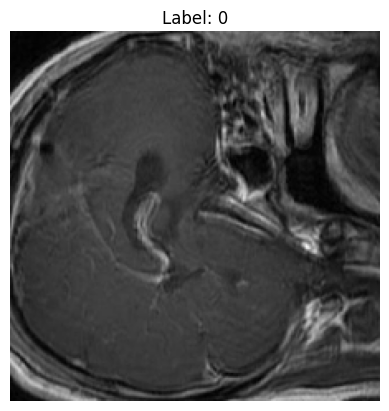

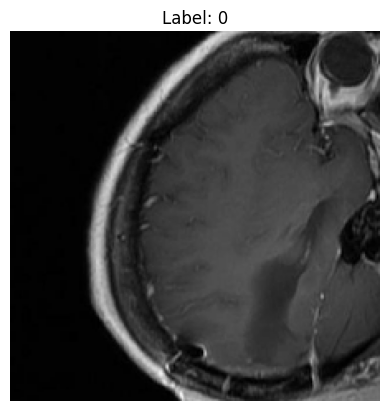

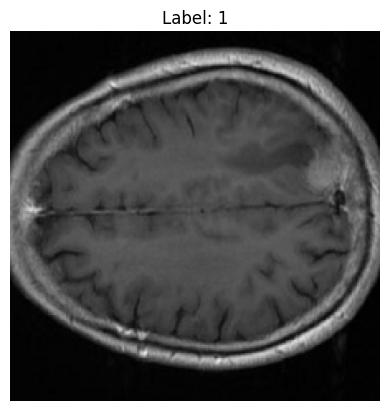

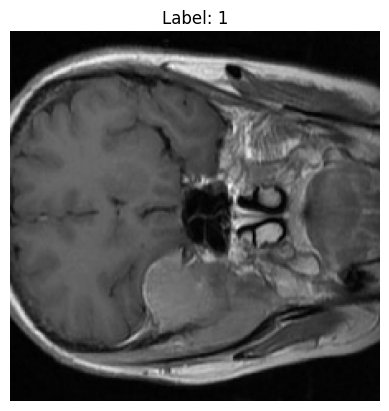

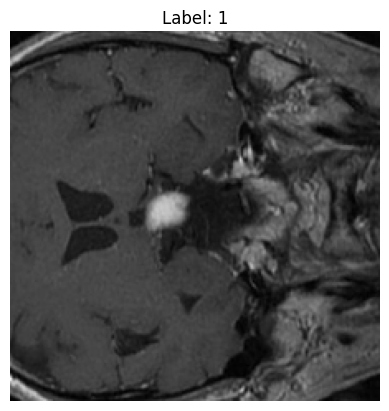

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
    plt.show()


In [ ]:
# This is Just Test Code
# preds = model.predict(X_valid[:5])
# print("Predictions:\n", preds)
# print("True labels:\n", y_valid[:5])


In [ ]:
# This is Just Testing Code
# X_small = X_train[:10]
# y_small = y_train[:10]

# model = build_pdcnn_model(input_shape=(224, 224, 3), num_classes=3)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_small, y_small, epochs=50, verbose=1)


In [ ]:
assert np.all(np.sum(y_train, axis=1) == 1), "❌ y_train contains invalid one-hot rows!"
assert np.all(np.sum(y_valid, axis=1) == 1), "❌ y_valid contains invalid one-hot rows!"


In [ ]:
print("✅ y_valid shape:", y_valid.shape)
print("✅ y_valid[0]:", y_valid[0])
print("✅ One-hot check:", np.sum(y_valid, axis=1).min(), np.sum(y_valid, axis=1).max())


✅ y_valid shape: (612, 3)
✅ y_valid[0]: [1. 0. 0.]
✅ One-hot check: 1.0 1.0


In [ ]:
# preds = model.predict(X_valid[:5])
# print("Model predictions:\n", preds)
# print("True labels:\n", y_valid[:5])


NameError: name 'model' is not defined

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0


In [ ]:
print(np.unique(np.argmax(y_train, axis=1)))  # should match [0, 1, 2] if num_classes=3
print(y_train[:5])  # should look like one-hot encoded vectors


[0 1 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
print(y_train.shape)  # (n_samples, 3) → categorical_crossentropy
# vs
# (n_samples,) → sparse_categorical_crossentropy


(2144, 3)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_pdcnn_model(input_shape=(224, 224, 3), num_classes=3):
    input_layer = Input(shape=input_shape)

    # Parallel Dilated Convolutions
    conv1 = Conv2D(64, (3,3), dilation_rate=1, padding='same', activation='relu')(input_layer)
    conv2 = Conv2D(64, (3,3), dilation_rate=2, padding='same', activation='relu')(input_layer)
    conv3 = Conv2D(64, (3,3), dilation_rate=3, padding='same', activation='relu')(input_layer)

    merged = Concatenate()([conv1, conv2, conv3])
    # x = merged
      # for filters in [64, 128]:
      #   x = Conv2D(filters, (3,3), padding='same')(x)
      #   x = BatchNormalization()(x)
      #   x = Activation('relu')(x)
      #   x = Dropout(0.4)(x)
      #   x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(64, (3, 3), padding='same')(merged)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.4)(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.4)(x)


    # x = Conv2D(128, (3,3), padding='same')(merged)
    # x = BatchNormalization()(x)
    # x = Activation('relu')(x)
    # x = MaxPooling2D(pool_size=(2,2))(x)

    x = GlobalAveragePooling2D()(x)
    # x = Dropout(0.4)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    # model = Model(inputs=input_layer, outputs=output_layer)
    # return model
    # return Model(inputs=input_layer, outputs=output_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
# Data Augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8,1.2]
)

datagen.fit(X_train)


In [ ]:
print(y_train.shape)  # Should be (N, 4)
print(y_train[0])     # Should look like [0, 1, 0, 0]


(2144, 3)
[1. 0. 0.]


In [ ]:
import numpy as np
np.unique(np.argmax(y_train, axis=1), return_counts=True)


(array([0, 1, 2]), array([983, 503, 658]))

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# model = build_pdcnn_model(input_shape=(224, 224, 3), num_classes=3)

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model = build_pdcnn_model(input_shape=(224, 224, 3), num_classes=3)

model.compile(
    optimizer=Adam(learning_rate=1e-3), # learning rate change from 1e-5 to 1e-3
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

class_weights = compute_class_weight('balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weights = dict(enumerate(class_weights))

# callbacks = [
#     EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
#     ReduceLROnPlateau(patience=3, factor=0.2, verbose=1)
# ]


callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
]





history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_valid, y_valid),
    epochs=30,
    callbacks=callbacks,
    class_weight=class_weights,
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 547ms/step - accuracy: 0.3487 - loss: 1.0911 - val_accuracy: 0.4641 - val_loss: 1.0980 - learning_rate: 0.0010
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 34s 504ms/step - accuracy: 0.4438 - loss: 1.0975 - val_accuracy: 0.3023 - val_loss: 1.0988 - learning_rate: 0.0010
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 34s 504ms/step - accuracy: 0.3609 - loss: 1.0922 - val_accuracy: 0.3023 - val_loss: 1.0987 - learning_rate: 0.0010
Epoch 4/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.2964 - loss: 1.1005
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 505ms/step - accuracy: 0.2964 - loss: 1.1005 - val_accuracy: 0.3023 - val_loss: 1.0986 - learning_rate: 0.0010
Epoch 5/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 32s 475ms/step - accuracy: 0.2915 - loss: 1.1007 - val_accuracy: 0.3023 - val_loss: 1.0981 - learning_rate: 5.0000e-04
Epoch 6/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 33s 491ms/step - accuracy: 0.2562 - loss: 

In [ ]:
print("Model output shape:", model.output_shape)  # should be (None, 3)
print("y_test shape:", y_test.shape)
print("y_test[0]:", y_test[0])


Model output shape: (None, 3)
y_test shape: (308, 4)
y_test[0]: [1. 0. 0. 0.]


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Ensure correct shape (N,) → (N, 3)
if len(y_test.shape) == 1:
    y_test = to_categorical(y_test, num_classes=3)

# If y_test has more than 3 classes (e.g. 4), trim
elif y_test.shape[1] > 3:
    y_test = y_test[:, :3]

# Ensure float32 dtype
y_test = y_test.astype(np.float32)

# Check everything
print("✅ y_test final shape:", y_test.shape)
print("✅ y_test dtype:", y_test.dtype)
print("✅ y_test sample:", y_test[0])


✅ y_test final shape: (308, 3)
✅ y_test dtype: float32
✅ y_test sample: [1. 0. 0.]


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - accuracy: 0.2727 - loss: 1.1006
🧪 Test Accuracy: 0.2825


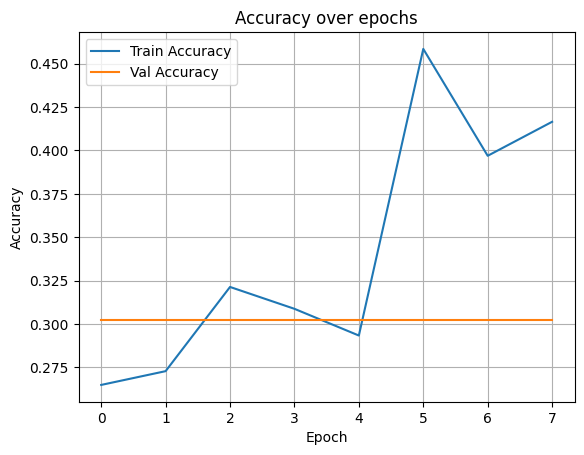

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"🧪 Test Accuracy: {acc:.4f}")
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


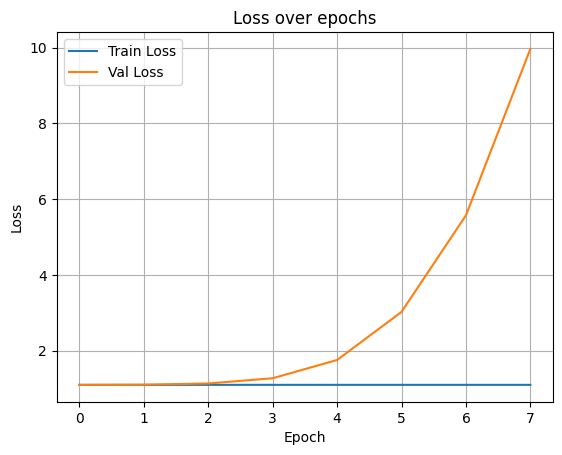

In [ ]:

# Plot loss too
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save("brain_tumor_xception_model.h5")
from tensorflow.keras.models import load_model

# Load the model
model = load_model("brain_tumor_xception_model.h5")



In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Define the same class labels used during training
classes = ["glioma", "meningioma", "pituitary", "no_tumor"]

def predict_image(model, image_path):
    # Load and preprocess image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction[0])

    # Show result
    plt.imshow(img)
    plt.title(f"Predicted: {classes[predicted_class]}")
    plt.axis('off')
    plt.show()

    print("📊 Prediction Probabilities:")
    for i, prob in enumerate(prediction[0]):
        print(f"{classes[i]}: {prob:.4f}")

    print(f"\n✅ Final Prediction: {classes[predicted_class]}")


In [ ]:
import pickle

# Saving the model using Pickle
model_dict = {
    'model': model,
    'architecture': model.to_json(),  # Save the model architecture as JSON
}

with open("brain_tumor_PDCNN_model.pkl", "wb") as f:
    pickle.dump(model_dict, f)


In [ ]:
from google.colab import files
files.download("brain_tumor_Hybrid_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
from tensorflow.keras.models import model_from_json

# Load the Pickle file
with open("brain_tumor_Hybrid_model.pkl", "rb") as f:
    model_dict = pickle.load(f)

# Load the model architecture from JSON
model = model_from_json(model_dict['architecture'])

# Load the model weights (assuming you saved weights earlier or separately)
model.load_weights('path_to_your_model_weights.h5')

# Now, the model is ready for use!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 38 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'path_to_your_model_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
model.save("brain_tumor_Hybrid_model.h5")